# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city.replace(" ", "+")}'
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kulia village
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | camocim
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | kidal
Processing Record 17 of Set 1 | buka
Processing Record 18 of Set 1 | kayangel
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | rund

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,15.30,72,0,3.09,US,1708123491
1,nar'yan-mar,67.6713,53.0870,-21.61,88,13,4.02,RU,1708123491
2,adamstown,-25.0660,-130.1015,24.93,79,88,3.95,PN,1708123491
3,blackmans bay,-43.0167,147.3167,19.29,72,80,0.45,AU,1708123491
4,whitehorse,60.7161,-135.0538,-3.32,63,0,5.66,CA,1708123491


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,15.30,72,0,3.09,US,1708123491
1,nar'yan-mar,67.6713,53.0870,-21.61,88,13,4.02,RU,1708123491
2,adamstown,-25.0660,-130.1015,24.93,79,88,3.95,PN,1708123491
3,blackmans bay,-43.0167,147.3167,19.29,72,80,0.45,AU,1708123491
4,whitehorse,60.7161,-135.0538,-3.32,63,0,5.66,CA,1708123491


In [70]:
# Timestamp
timestamp = city_data_df['Date'][0]

# Convert timestamp to a time tuple
time_tuple = time.localtime(timestamp)

# Extract year, month, and day components
year, month, day = time_tuple[:3]

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

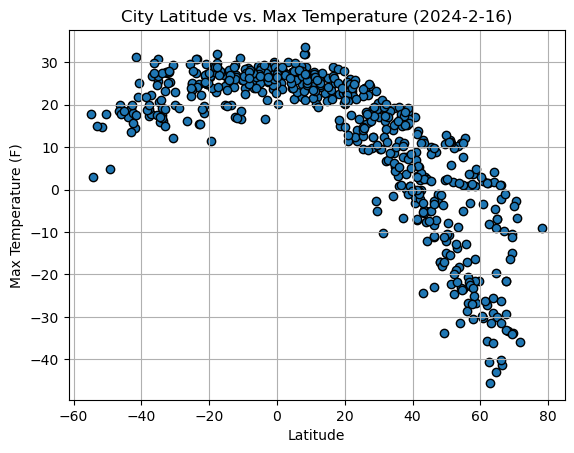

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({year}-{month}-{day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

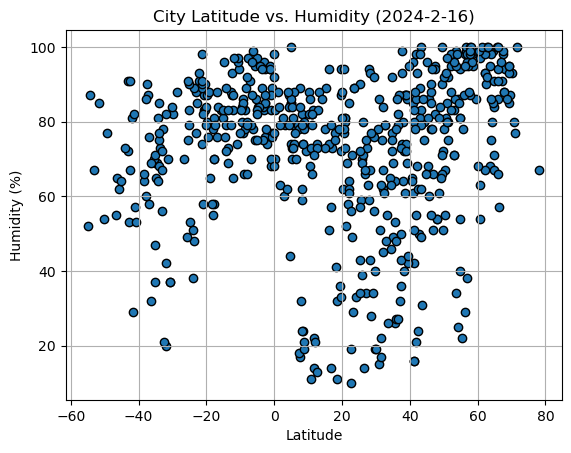

In [67]:
# Build scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({year}-{month}-{day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

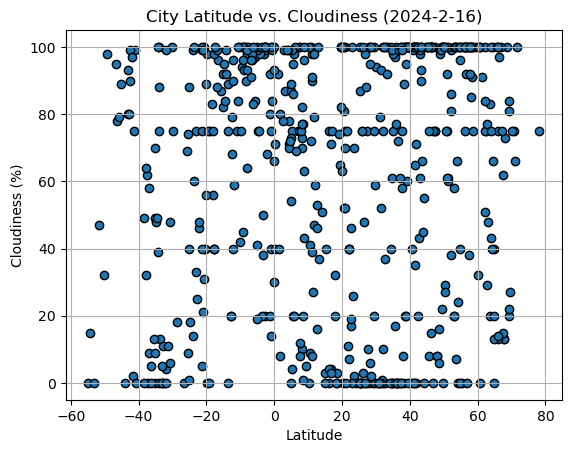

In [68]:
# Build scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({year}-{month}-{day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

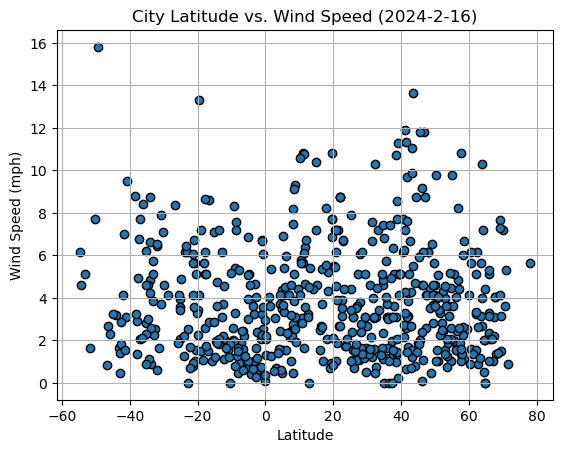

In [69]:
# Build scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({year}-{month}-{day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
vals = []

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(title)
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.tight_layout()
    plt.show()
    val = f'{x_values.name} vs {y_values.name}: {line_eq}, R: {rvalue**2}'
    vals.append(val)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,15.30,72,0,3.09,US,1708123491
1,nar'yan-mar,67.6713,53.0870,-21.61,88,13,4.02,RU,1708123491
4,whitehorse,60.7161,-135.0538,-3.32,63,0,5.66,CA,1708123491
5,hawaiian paradise park,19.5933,-154.9731,23.83,94,100,7.72,US,1708123492
7,albany,42.6001,-73.9662,-0.11,50,43,2.68,US,1708123251


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,24.93,79,88,3.95,PN,1708123491
3,blackmans bay,-43.0167,147.3167,19.29,72,80,0.45,AU,1708123491
6,grytviken,-54.2811,-36.5092,3.02,87,15,4.62,GS,1708123492
8,ushuaia,-54.8000,-68.3000,17.81,52,0,6.17,AR,1708123281
9,waitangi,-43.9535,-176.5597,17.12,73,0,3.20,NZ,1708123492


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7166975579277072


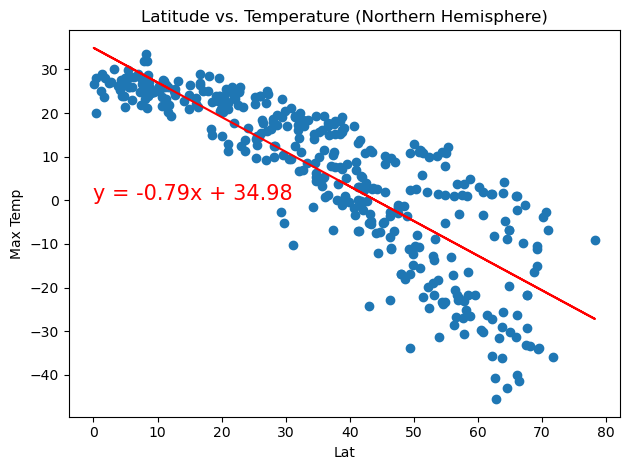

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Latitude vs. Temperature (Northern Hemisphere)',(0,0))

The r-value is: 0.29246204289074895


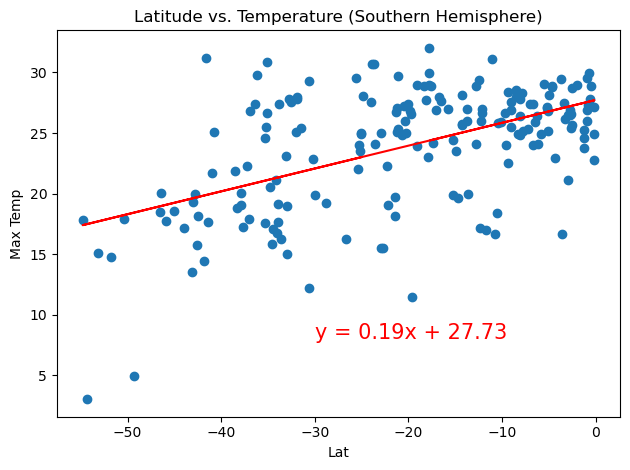

In [39]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Latitude vs. Temperature (Southern Hemisphere)', (-30,8))

**Discussion about the linear relationship:** 
    
    Northern Hemisphere: The equation of the regression line is y = -0.79x + 34.98 with an R-squared value of 0.72. This indicates a moderately strong negative correlation between latitude and temperature in the Northern Hemisphere.
    
    Southern Hemisphere: The equation of the regression line is y = 0.19x + 27.73 with an R-squared value of 0.29. This indicates a weaker positive correlation between latitude and temperature in the Southern Hemisphere compared to the Northern Hemisphere.

    The high R-squared value for the Northern Hemisphere suggests that latitude is a strong predictor of temperature variation in this hemisphere, while the lower R-squared value for the Southern Hemisphere indicates that other factors may also influence temperature variation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08869980952225427


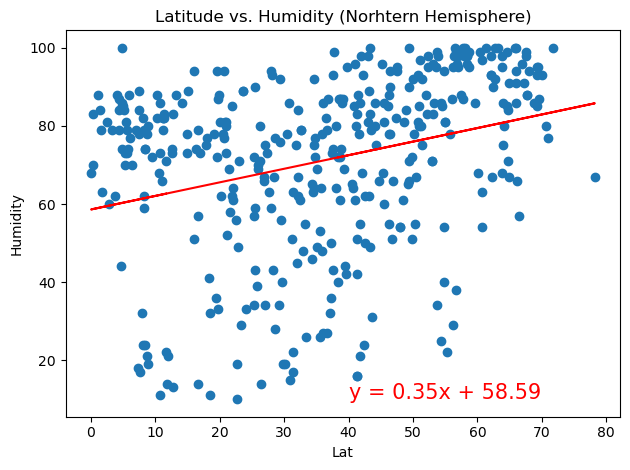

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Latitude vs. Humidity (Norhtern Hemisphere)', (40,10))

The r-value is: 0.21424028663107367


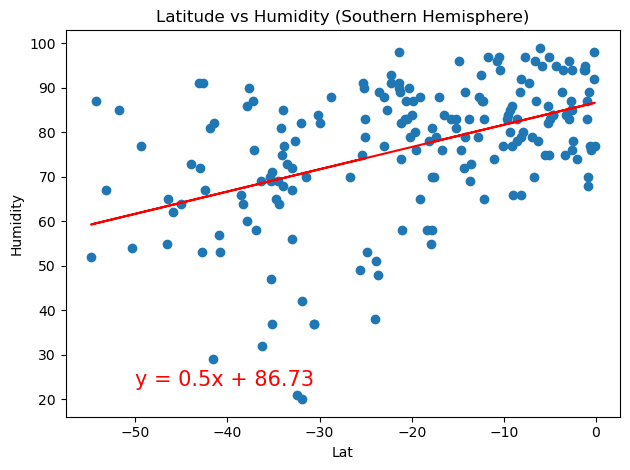

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Latitude vs Humidity (Southern Hemisphere)', (-50,23))

**Discussion about the linear relationship:** 

    Northern Hemisphere: The equation of the regression line is y = 0.35x + 58.59 with an R-squared value of 0.09. This indicates a weak positive correlation between latitude and humidity in the Northern Hemisphere. In the Northern Hemisphere, as latitude increases (moving away from the equator towards the poles), temperature tends to decrease.
    
    Southern Hemisphere: The equation of the regression line is y = 0.5x + 86.73 with an R-squared value of 0.21. This indicates a weak positive correlation between latitude and humidity in the Southern Hemisphere. In the Southern Hemisphere, as latitude increases (moving towards the equator from the poles), temperature tends to increase, although the relationship is weaker than in the Northern Hemisphere.

    Both hemispheres exhibit a positive correlation between latitude and humidity, indicating that as latitude increases (either towards the poles in the Northern Hemisphere or towards the equator in the Southern Hemisphere), humidity tends to increase. However, the relationships are relatively weak, with low R-squared values indicating that latitude alone may not be a strong predictor of humidity variation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01542057055819084


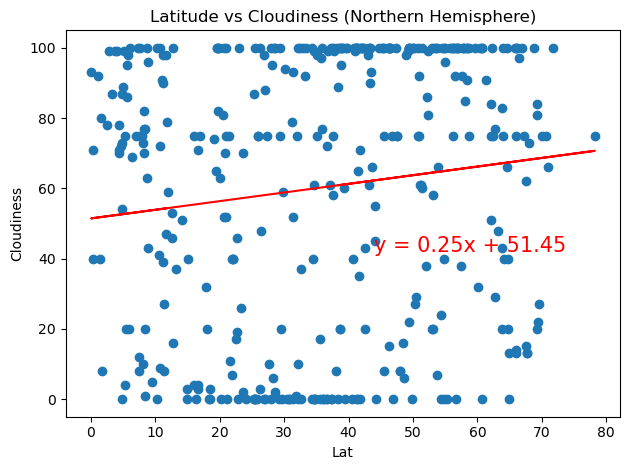

In [42]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_north, y_values_north, 'Latitude vs Cloudiness (Northern Hemisphere)', (44,42))

The r-value is: 0.14654493325997378


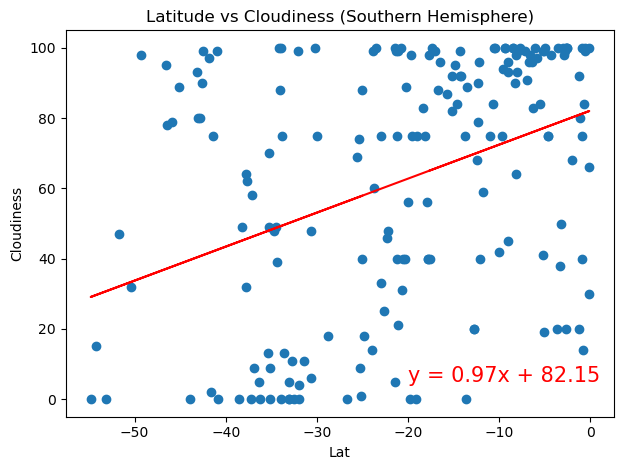

In [43]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_south, y_values_south, 'Latitude vs Cloudiness (Southern Hemisphere)', (-20,5))

**Discussion about the linear relationship:** 

    Northern Hemisphere: The equation of the regression line is y = 0.25x + 51.45 with an R-squared value of 0.02. This indicates a very weak positive correlation between latitude and cloudiness in the Northern Hemisphere.
    
    Southern Hemisphere: The equation of the regression line is y = 0.97x + 82.15 with an R-squared value of 0.15. This indicates a weak positive correlation between latitude and cloudiness in the Southern Hemisphere.

    Both hemispheres exhibit a positive correlation between latitude and cloudiness, indicating that as latitude increases (either towards the poles in the Northern Hemisphere or towards the equator in the Southern Hemisphere), cloudiness tends to increase. However, the relationships are relatively weak, with very low R-squared values indicating that latitude alone may not be a good predictor of cloudiness variation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002795552612778089


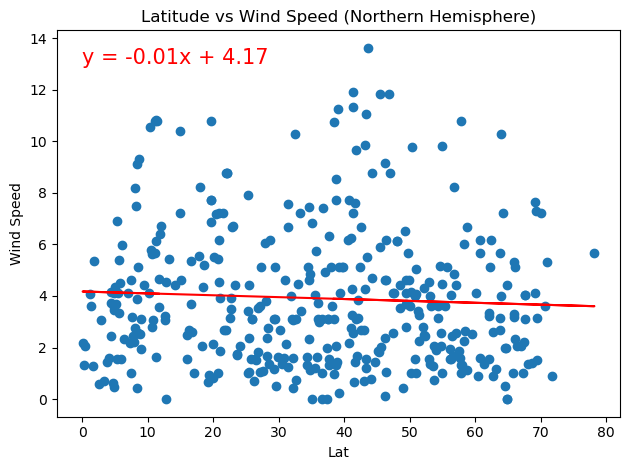

In [44]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_north, y_values_north, 'Latitude vs Wind Speed (Northern Hemisphere)', (0,13))

The r-value is: 0.060519804087202776


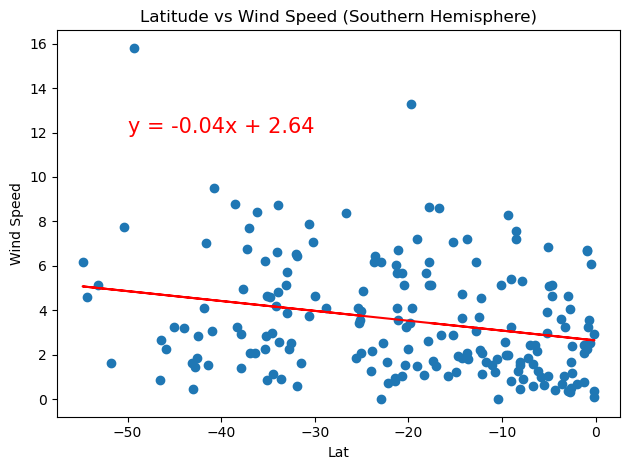

In [45]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_south, y_values_south, 'Latitude vs Wind Speed (Southern Hemisphere)', (-50,12))

**Discussion about the linear relationship:** 

    Northern Hemisphere: The equation of the regression line is y = -0.01x + 4.17 with an R-squared value of 0.003. This indicates a very weak negative correlation between latitude and wind speed in the Northern Hemisphere.
    
    Southern Hemisphere: The equation of the regression line is y = -0.04x + 2.64 with an R-squared value of 0.06. This indicates a weak negative correlation between latitude and wind speed in the Southern Hemisphere.

    These results suggest that there is only a minimal association between latitude and wind speed in both the Northern and Southern Hemispheres. The low R-squared values indicate that latitude alone may not be a good predictor of wind speed. 